## Feature Engineering and CV based Winners' Solutions

`param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8,
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'merror',
         'min_child_weight': 10,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}`

Max MAP@7 of 0.8612092 achieved at iteration 123, private LB=0.0302531, public LB=0.0298352

New in this notebook:
- Trained@2015-06-28, validated@2015-12-28
- `min_child_weight=10` is much better than `min_child_weight=1`, try more trees to find the optimal number of iterations

In [1]:
from santander_helper import *

Train, validate, and predict, repetition 0 of 5
[0]	train-merror:0.294974	val-merror:0.347556	train-MAP@7:0	val-MAP@7:0.827417
[1]	train-merror:0.290465	val-merror:0.341639	train-MAP@7:0	val-MAP@7:0.831906
[2]	train-merror:0.286089	val-merror:0.338903	train-MAP@7:0	val-MAP@7:0.83558
[3]	train-merror:0.285696	val-merror:0.335542	train-MAP@7:0	val-MAP@7:0.838663
[4]	train-merror:0.284739	val-merror:0.33582	train-MAP@7:0	val-MAP@7:0.838362
[5]	train-merror:0.284077	val-merror:0.333251	train-MAP@7:0	val-MAP@7:0.841912
[6]	train-merror:0.283449	val-merror:0.333039	train-MAP@7:0	val-MAP@7:0.843281
[7]	train-merror:0.283122	val-merror:0.332111	train-MAP@7:0	val-MAP@7:0.844928
[8]	train-merror:0.282772	val-merror:0.330297	train-MAP@7:0	val-MAP@7:0.847062
[9]	train-merror:0.281847	val-merror:0.33012	train-MAP@7:0	val-MAP@7:0.848437
[10]	train-merror:0.281516	val-merror:0.329214	train-MAP@7:0	val-MAP@7:0.849377
[11]	train-merror:0.281154	val-merror:0.329014	train-MAP@7:0	val-MAP@7:0.850162
[12]	

[103]	train-merror:0.259852	val-merror:0.322081	train-MAP@7:0	val-MAP@7:0.860357
[104]	train-merror:0.25968	val-merror:0.322005	train-MAP@7:0	val-MAP@7:0.860519
[105]	train-merror:0.259581	val-merror:0.322005	train-MAP@7:0	val-MAP@7:0.860511
[106]	train-merror:0.259409	val-merror:0.322075	train-MAP@7:0	val-MAP@7:0.860545
[107]	train-merror:0.259485	val-merror:0.32198	train-MAP@7:0	val-MAP@7:0.860629
[108]	train-merror:0.259266	val-merror:0.321993	train-MAP@7:0	val-MAP@7:0.860625
[109]	train-merror:0.259201	val-merror:0.322008	train-MAP@7:0	val-MAP@7:0.860635
[110]	train-merror:0.259003	val-merror:0.321824	train-MAP@7:0	val-MAP@7:0.860718
[111]	train-merror:0.258776	val-merror:0.321951	train-MAP@7:0	val-MAP@7:0.860631
[112]	train-merror:0.258717	val-merror:0.321789	train-MAP@7:0	val-MAP@7:0.860789
[113]	train-merror:0.258622	val-merror:0.322052	train-MAP@7:0	val-MAP@7:0.860667
[114]	train-merror:0.258351	val-merror:0.322049	train-MAP@7:0	val-MAP@7:0.860639
[115]	train-merror:0.258231	va

[54]	train-merror:0.268558	val-merror:0.322973	train-MAP@7:0	val-MAP@7:0.858321
[55]	train-merror:0.268362	val-merror:0.322925	train-MAP@7:0	val-MAP@7:0.858458
[56]	train-merror:0.26814	val-merror:0.322781	train-MAP@7:0	val-MAP@7:0.858671
[57]	train-merror:0.267918	val-merror:0.322824	train-MAP@7:0	val-MAP@7:0.858815
[58]	train-merror:0.267619	val-merror:0.322876	train-MAP@7:0	val-MAP@7:0.858861
[59]	train-merror:0.267345	val-merror:0.322814	train-MAP@7:0	val-MAP@7:0.859108
[60]	train-merror:0.267042	val-merror:0.322816	train-MAP@7:0	val-MAP@7:0.859132
[61]	train-merror:0.26673	val-merror:0.322789	train-MAP@7:0	val-MAP@7:0.859247
[62]	train-merror:0.266506	val-merror:0.322836	train-MAP@7:0	val-MAP@7:0.859203
[63]	train-merror:0.266401	val-merror:0.322959	train-MAP@7:0	val-MAP@7:0.859211
[64]	train-merror:0.266302	val-merror:0.322766	train-MAP@7:0	val-MAP@7:0.859293
[65]	train-merror:0.266021	val-merror:0.322611	train-MAP@7:0	val-MAP@7:0.859501
[66]	train-merror:0.265719	val-merror:0.32

[5]	train-merror:0.284238	val-merror:0.331375	train-MAP@7:0	val-MAP@7:0.848948
[6]	train-merror:0.284129	val-merror:0.331414	train-MAP@7:0	val-MAP@7:0.848842
[7]	train-merror:0.283507	val-merror:0.331313	train-MAP@7:0	val-MAP@7:0.848771
[8]	train-merror:0.282931	val-merror:0.330811	train-MAP@7:0	val-MAP@7:0.848715
[9]	train-merror:0.28184	val-merror:0.330701	train-MAP@7:0	val-MAP@7:0.848927
[10]	train-merror:0.281344	val-merror:0.329072	train-MAP@7:0	val-MAP@7:0.850286
[11]	train-merror:0.281033	val-merror:0.328349	train-MAP@7:0	val-MAP@7:0.850941
[12]	train-merror:0.280535	val-merror:0.328642	train-MAP@7:0	val-MAP@7:0.850832
[13]	train-merror:0.280423	val-merror:0.328218	train-MAP@7:0	val-MAP@7:0.850842
[14]	train-merror:0.279656	val-merror:0.3277	train-MAP@7:0	val-MAP@7:0.851366
[15]	train-merror:0.279437	val-merror:0.327633	train-MAP@7:0	val-MAP@7:0.851471
[16]	train-merror:0.279382	val-merror:0.327475	train-MAP@7:0	val-MAP@7:0.851926
[17]	train-merror:0.279104	val-merror:0.327289	t

[108]	train-merror:0.258946	val-merror:0.321592	train-MAP@7:0	val-MAP@7:0.861245
[109]	train-merror:0.258943	val-merror:0.321477	train-MAP@7:0	val-MAP@7:0.861225
[110]	train-merror:0.258802	val-merror:0.321285	train-MAP@7:0	val-MAP@7:0.861352
[111]	train-merror:0.258543	val-merror:0.321371	train-MAP@7:0	val-MAP@7:0.861321
[112]	train-merror:0.258425	val-merror:0.321294	train-MAP@7:0	val-MAP@7:0.86141
[113]	train-merror:0.25829	val-merror:0.32129	train-MAP@7:0	val-MAP@7:0.861387
[114]	train-merror:0.258211	val-merror:0.321322	train-MAP@7:0	val-MAP@7:0.861422
[115]	train-merror:0.257938	val-merror:0.321219	train-MAP@7:0	val-MAP@7:0.861484
[116]	train-merror:0.257765	val-merror:0.321175	train-MAP@7:0	val-MAP@7:0.861506
[117]	train-merror:0.257606	val-merror:0.321141	train-MAP@7:0	val-MAP@7:0.861539
[118]	train-merror:0.257366	val-merror:0.32118	train-MAP@7:0	val-MAP@7:0.861561
[119]	train-merror:0.257353	val-merror:0.321033	train-MAP@7:0	val-MAP@7:0.861659
[120]	train-merror:0.257181	val-

[59]	train-merror:0.267126	val-merror:0.322796	train-MAP@7:0	val-MAP@7:0.857943
[60]	train-merror:0.266995	val-merror:0.322815	train-MAP@7:0	val-MAP@7:0.858122
[61]	train-merror:0.266745	val-merror:0.323076	train-MAP@7:0	val-MAP@7:0.858051
[62]	train-merror:0.266672	val-merror:0.322984	train-MAP@7:0	val-MAP@7:0.858178
[63]	train-merror:0.266145	val-merror:0.323016	train-MAP@7:0	val-MAP@7:0.858241
[64]	train-merror:0.266299	val-merror:0.322881	train-MAP@7:0	val-MAP@7:0.858393
[65]	train-merror:0.265942	val-merror:0.322855	train-MAP@7:0	val-MAP@7:0.858435
[66]	train-merror:0.265741	val-merror:0.322576	train-MAP@7:0	val-MAP@7:0.858646
[67]	train-merror:0.265551	val-merror:0.322584	train-MAP@7:0	val-MAP@7:0.858818
[68]	train-merror:0.265447	val-merror:0.322438	train-MAP@7:0	val-MAP@7:0.85898
[69]	train-merror:0.265333	val-merror:0.322455	train-MAP@7:0	val-MAP@7:0.859118
[70]	train-merror:0.265245	val-merror:0.322635	train-MAP@7:0	val-MAP@7:0.859133
[71]	train-merror:0.264918	val-merror:0.3

[10]	train-merror:0.280513	val-merror:0.329015	train-MAP@7:0	val-MAP@7:0.850316
[11]	train-merror:0.280042	val-merror:0.328492	train-MAP@7:0	val-MAP@7:0.850616
[12]	train-merror:0.280235	val-merror:0.328743	train-MAP@7:0	val-MAP@7:0.851044
[13]	train-merror:0.279815	val-merror:0.327889	train-MAP@7:0	val-MAP@7:0.851843
[14]	train-merror:0.279376	val-merror:0.327282	train-MAP@7:0	val-MAP@7:0.852726
[15]	train-merror:0.279047	val-merror:0.327362	train-MAP@7:0	val-MAP@7:0.85297
[16]	train-merror:0.279219	val-merror:0.326843	train-MAP@7:0	val-MAP@7:0.853647
[17]	train-merror:0.27883	val-merror:0.326549	train-MAP@7:0	val-MAP@7:0.853871
[18]	train-merror:0.2789	val-merror:0.326397	train-MAP@7:0	val-MAP@7:0.854081
[19]	train-merror:0.278231	val-merror:0.325995	train-MAP@7:0	val-MAP@7:0.854595
[20]	train-merror:0.278102	val-merror:0.32609	train-MAP@7:0	val-MAP@7:0.854698
[21]	train-merror:0.277825	val-merror:0.32584	train-MAP@7:0	val-MAP@7:0.855164
[22]	train-merror:0.277224	val-merror:0.325561

[113]	train-merror:0.258067	val-merror:0.321947	train-MAP@7:0	val-MAP@7:0.861277
[114]	train-merror:0.257809	val-merror:0.321821	train-MAP@7:0	val-MAP@7:0.861397
[115]	train-merror:0.257816	val-merror:0.321766	train-MAP@7:0	val-MAP@7:0.861445
[116]	train-merror:0.257628	val-merror:0.321833	train-MAP@7:0	val-MAP@7:0.861422
[117]	train-merror:0.257485	val-merror:0.321924	train-MAP@7:0	val-MAP@7:0.861394
[118]	train-merror:0.257159	val-merror:0.322038	train-MAP@7:0	val-MAP@7:0.861394
[119]	train-merror:0.257045	val-merror:0.321862	train-MAP@7:0	val-MAP@7:0.861447
[120]	train-merror:0.256753	val-merror:0.321845	train-MAP@7:0	val-MAP@7:0.861442
[121]	train-merror:0.25672	val-merror:0.321889	train-MAP@7:0	val-MAP@7:0.861352
[122]	train-merror:0.256535	val-merror:0.321793	train-MAP@7:0	val-MAP@7:0.861407
[123]	train-merror:0.256358	val-merror:0.321815	train-MAP@7:0	val-MAP@7:0.861335
[124]	train-merror:0.256035	val-merror:0.322179	train-MAP@7:0	val-MAP@7:0.861166
[125]	train-merror:0.255863	v

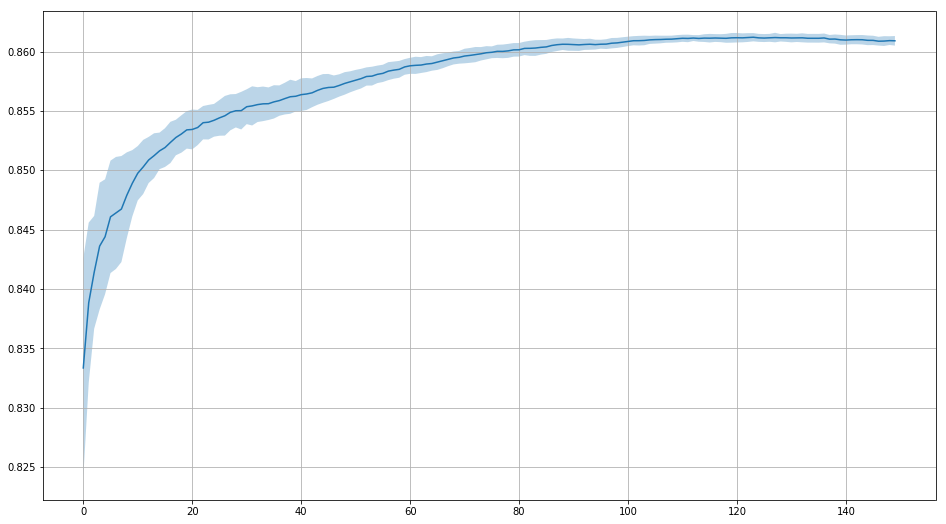

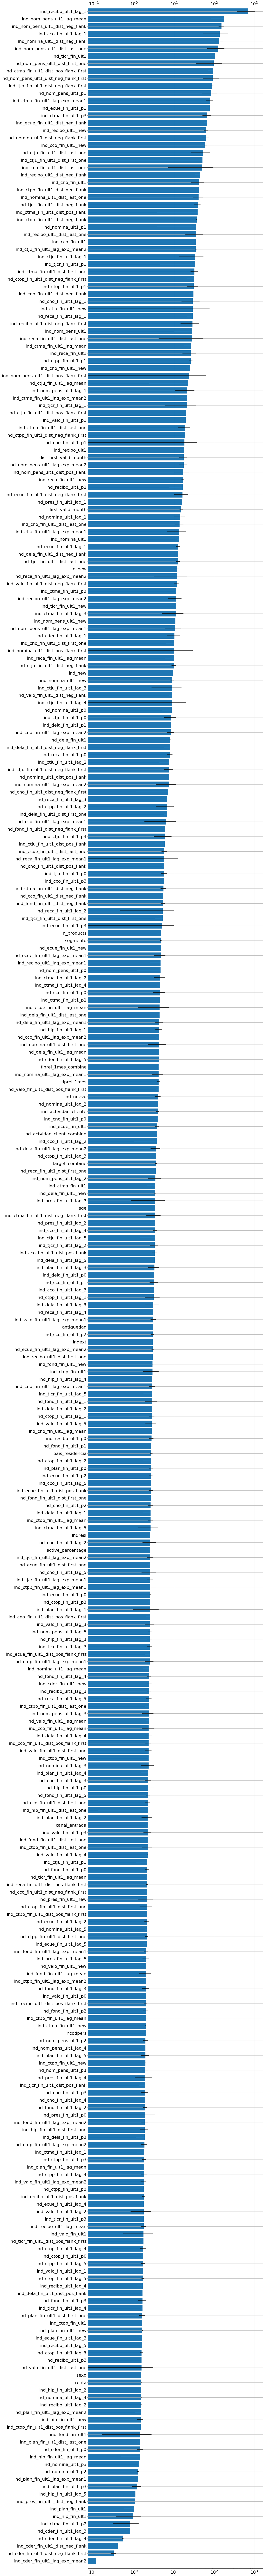

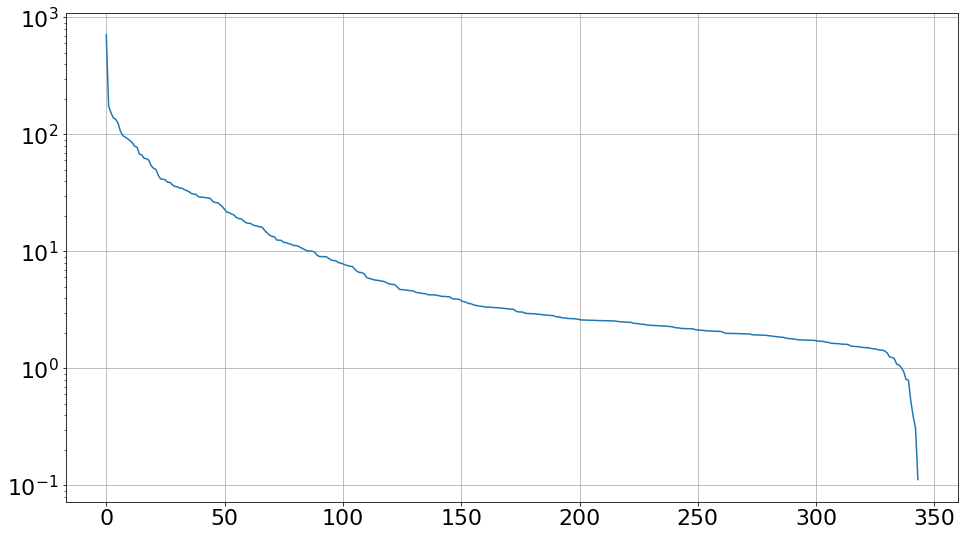

In [2]:
# Train, validation, and prediction
simulation_name = 'p2'
param = {'objective': 'multi:softprob', 
         'eta': 0.05, 
         'max_depth': 8,
         'silent': 1, 
         'num_class': len(target_cols),
         'eval_metric': 'merror',
         'min_child_weight': 10,
         'subsample': 0.7,
         'colsample_bytree': 0.7,
         'seed': 0}
num_rounds = 150
n_repeat = 5

history, model_dict, y_pred, y_sub = \
    train_test_month(param, num_rounds, 
    '2015-06-28', '2016-05-28', 
    sub_name='eda_4_32_{}.csv.gz'.format(simulation_name), 
    n_repeat=n_repeat, random_seed=54, n_features=350, 
    eval_train_flag=False)

# History and learning curve
history_train = history.xs(axis=1, level=[1, 2], key=['train', 'MAP@7']).copy()
history_train['mean'] = history_train.iloc[:, :n_repeat].mean(axis=1)
history_train['std'] = history_train.iloc[:, :n_repeat].std(axis=1)

history_val = history.xs(axis=1, level=[1, 2], key=['val', 'MAP@7']).copy()
history_val['mean'] = history_val.iloc[:, :n_repeat].mean(axis=1)
history_val['std'] = history_val.iloc[:, :n_repeat].std(axis=1)

plt.figure(figsize=(16, 9))
# plt.plot(history_train['mean'])
# plt.fill_between(history_train.index, history_train['mean']+history_train['std'], history_train['mean']-history_train['std'], alpha=0.3)

plt.plot(history_val['mean'])
plt.fill_between(history_val.index, history_val['mean']+history_val['std'], history_val['mean']-history_val['std'], alpha=0.3)

plt.grid()

# Feature importance
fi = pd.DataFrame({i: model_dict[i].get_score(importance_type='gain') for i in range(n_repeat)})
fi['mean'] = fi.iloc[:, :n_repeat].mean(axis=1)
fi['std'] = fi.iloc[:, :n_repeat].std(axis=1)
fi.sort_values(by=['mean'], inplace=True, ascending=False)
# fi.reset_index(inplace=True)
#fi.to_csv('feature_importance_{}.csv'.format(simulation_name))

plt.rcParams.update({'figure.figsize': '16, 240'})
plt.rcParams.update({'font.size': '22'})
fig, ax = plt.subplots()
ax.barh(fi.index, fi['mean'].values, log=True, xerr=fi['std'].values)
ax.grid()
ax.tick_params(labelbottom=True,labeltop=True)
ax.set_ylim(fi.shape[0], -0.5)

plt.figure(figsize=(16, 9))
plt.plot(fi.values[:, n_repeat])
plt.grid()
plt.yscale('log')

# Save data
save_pickle('parameter_tune_eda_4_32_{}.pickle'.format(simulation_name), (history, model_dict, y_pred, y_sub, fi, param))

In [3]:
history_val

repetition,0,1,2,3,4,mean,std
0,0.827417,0.844049,0.830935,0.822642,0.841753,0.833359,0.009230
1,0.831906,0.848539,0.842250,0.833607,0.837978,0.838856,0.006744
2,0.835580,0.847619,0.844618,0.838931,0.840318,0.841413,0.004748
3,0.838663,0.850740,0.847422,0.838847,0.842418,0.843618,0.005337
4,0.838362,0.850340,0.847213,0.840781,0.845340,0.844407,0.004838
5,0.841912,0.851530,0.848948,0.840425,0.847610,0.846085,0.004733
6,0.843281,0.851373,0.848842,0.839835,0.848735,0.846413,0.004716
7,0.844928,0.851545,0.848771,0.839954,0.848510,0.846742,0.004463
8,0.847062,0.852344,0.848715,0.842451,0.848981,0.847911,0.003605
9,0.848437,0.852364,0.848927,0.844710,0.850108,0.848909,0.002794


In [4]:
print('Max MAP@7 of {:.7f} achieved at iteration {}.'.format(history_val['mean'].max(), history_val['mean'].idxmax()))

Max MAP@7 of 0.8612092 achieved at iteration 123.
